Test and play with the matplotlib `basemap` library.  
Currently in this notebook I'm outputing and using the borders map.

All methods:  
https://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.shadedrelief

Not done: maybe add mask (e.g. for europe):  
https://jan-46106.medium.com/plotting-maps-with-european-data-in-python-part-i-decd83837de4

In [1]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.ioff()
import cv2
from skimage import io

In [4]:
fig_siz = (4,4)

In [23]:
fig = plt.figure(figsize=fig_siz)
m = Basemap()
m.drawcoastlines()
fig.show()

/tmp/ipykernel_113206/2007494384.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


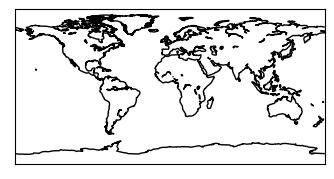

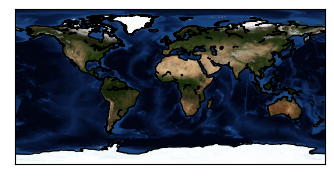

In [24]:
# blue marble (nasa) + coast line
fig = plt.figure(figsize=fig_siz)
m = Basemap()

m.drawcoastlines()
m.bluemarble(scale=0.2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


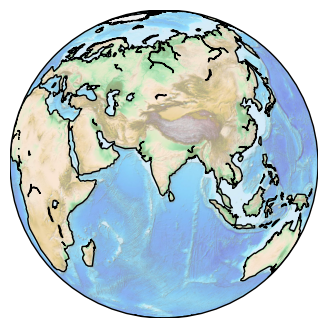

In [25]:
# Different projection and alpha:
plt.figure(figsize=fig_siz)
m = Basemap(projection='ortho', lat_0=20, lon_0=78)
m.drawcoastlines()
m.etopo(scale=0.5,alpha=0.5);
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


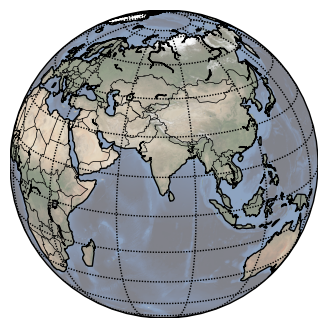

In [26]:
plt.figure(figsize=fig_siz)
m = Basemap(projection='ortho', lat_0=20, lon_0=78)
# lats and longs are returned as a dictionary
lats = m.drawparallels(np.linspace(-90, 90, 13))
lons = m.drawmeridians(np.linspace(-180, 180, 13))
m.drawcoastlines()

m.drawcountries()
m.bluemarble(alpha=0.5);
plt.show()

### Maps that look good for our needs but have color:

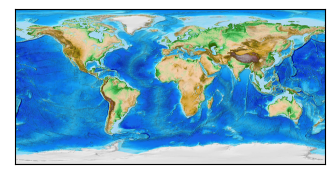

In [27]:
fig = plt.figure(figsize=fig_siz)
m = Basemap()#projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.etopo()
plt.show()

In [28]:
fig = plt.figure(figsize=fig_siz)

m = Basemap(projection='cyl')
m.drawcoastlines()
m.drawcountries(zorder=1,color="black", linewidth=1)
m.shadedrelief()


In [29]:
fig = plt.figure(figsize=(100, 50))

plt.gca().set_axis_off()
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

m = Basemap(projection='cyl')
m.drawcoastlines()
m.drawcountries(zorder=1,color="black", linewidth=1)
m.shadedrelief()

plt.savefig('shadedrelief.png',
       bbox_inches='tight', pad_inches=0)
plt.close(fig)

/tmp/ipykernel_115114/596293389.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


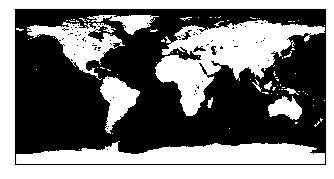

In [11]:
fig = plt.figure(figsize=fig_siz)

m = Basemap(projection='cyl')
# m.drawmapboundary(fill_color='black')
# m.fillcontinents(color='white',lake_color='black')
m.drawlsmask(land_color = 'white', 
               ocean_color="black",
               resolution = 'i')
fig.show()


In [12]:
fig = plt.figure(figsize=(100, 50))

plt.gca().set_axis_off()
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

m = Basemap(projection='cyl')
m.drawlsmask(land_color = 'white', 
               ocean_color="black",
               resolution = 'i')
fig.show()
plt.savefig('mask.png',
       bbox_inches='tight', pad_inches=0)

plt.close(fig)

/tmp/ipykernel_115114/3373394928.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [26]:
## see it as grayscale:

im = io.imread('shadedrelief.png')
gray = cv2.cvtColor(im, cv2.COLOR_RGBA2GRAY)

mask = io.imread('mask.png')
mask = cv2.cvtColor(mask, cv2.COLOR_RGBA2GRAY)

In [27]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(mask,-1,kernel)

In [28]:
np.unique(dst)

array([  0,  10,  20,  31,  41,  51,  61,  71,  82,  92, 102, 112, 122,
       133, 143, 153, 163, 173, 184, 194, 204, 214, 224, 235, 245, 255],
      dtype=uint8)

In [29]:
gray[dst<150] = 0

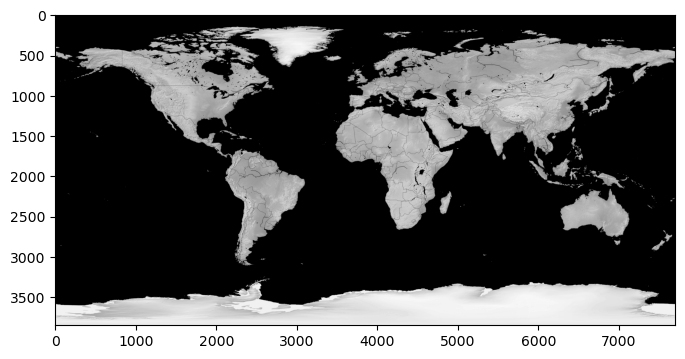

In [30]:
plt.figure(figsize=(8,8))
plt.imshow(gray, cmap='gray')

In [31]:
io.imsave('shadedrelief_w_borders_and_mask_gray.tif', gray)

### Borders

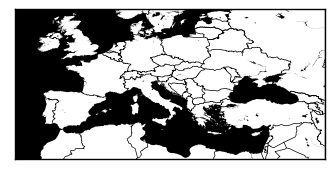

In [16]:
# europe
fig = plt.figure(figsize=fig_siz)

m = Basemap(projection='cyl',llcrnrlat=30,urcrnrlat=60,\
            llcrnrlon=-15,urcrnrlon=46.9696,resolution='i')

m.drawlsmask()
m.fillcontinents(color='white',lake_color='black')
m.drawmapboundary(fill_color='black')
m.drawcountries()


In [17]:
# europe
fig = plt.figure(figsize=(20, 40))

plt.gca().set_axis_off()
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=30,urcrnrlat=60,\
            llcrnrlon=-15,urcrnrlon=46.9696,resolution='i')

# m = Basemap(projection='cyl',resolution='i')


#m.drawcoastlines()
m.drawlsmask()
m.fillcontinents(color='white',lake_color='black')
m.drawmapboundary(fill_color='black')
m.drawcountries()
#plt.title("Equidistant Cylindrical Projection")

plt.savefig('borders_europe.png',
       bbox_inches='tight', pad_inches=0)
plt.close(fig)

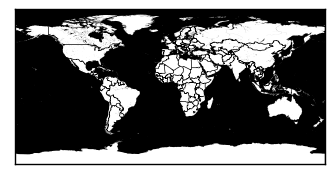

In [18]:
# europe
fig = plt.figure(figsize=fig_siz)

m = Basemap(projection='cyl', resolution='i')

m.drawlsmask()
m.fillcontinents(color='white',lake_color='black')
m.drawmapboundary(fill_color='black')
m.drawcountries()


In [19]:
# world
fig = plt.figure(figsize=(20, 40))

plt.gca().set_axis_off()
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
# m = Basemap(projection='cyl',llcrnrlat=30,urcrnrlat=60,\
#             llcrnrlon=-15,urcrnrlon=46.9696,resolution='i')

m = Basemap(projection='cyl',resolution='i')


#m.drawcoastlines()
m.drawlsmask()
m.fillcontinents(color='white',lake_color='black')
m.drawmapboundary(fill_color='black')
m.drawcountries()
#plt.title("Equidistant Cylindrical Projection")

plt.savefig('borders.png', bbox_inches='tight', pad_inches=0)
plt.close(fig)

### Elevation map downloaded from server:

/home/ella/mambaforge/envs/pyvista_basemap/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_113206/4222718953.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


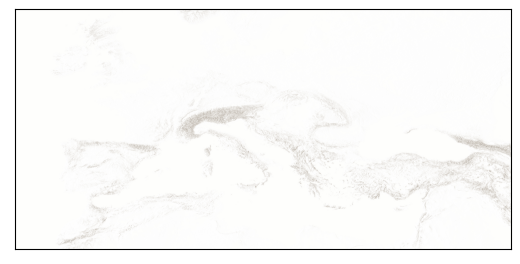

In [20]:
m = Basemap(projection='cyl',llcrnrlat=30,urcrnrlat=60,\
            llcrnrlon=-15,urcrnrlon=46.9696)#,resolution='i')
#m.drawcoastlines()
#m.drawlsmask()
m.arcgisimage(server='https://server.arcgisonline.com/ArcGIS/', 
              service='Elevation/World_Hillshade', 
              xpixels=4000, 
              verbose=False)
fig.show()